https://towardsdatascience.com/an-end-to-end-data-science-project-that-will-boost-your-portfolio-c53cfe16f0e3

In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
%matplotlib inline
import matplotlib.pyplot as plt
import gmaps
import gmaps.datasets

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
#df.info()

In [4]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [5]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

In [6]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
profile.to_widgets()

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
#profile.to_file(r'/home/grant/project_for_portfolio/output.html')

In [9]:
#find the maximum price for a rental
max(df['price'].values)

10000

### https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/

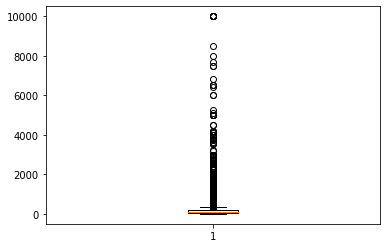

In [10]:
y = list(df.price)
plt.boxplot(y)
plt.show()

In [11]:
earthquake_df = gmaps.datasets.load_dataset_as_df('earthquakes')
earthquake_df.head()

latitude   longitude  magnitude
0  65.193300 -149.072500       1.70
1  38.791832 -122.780830       2.10
2  38.818001 -122.792168       0.48
3  33.601667 -116.727667       0.78
4  37.378334 -118.520836       3.64

In [12]:
locations = earthquake_df[["latitude", "longitude"]]
weights = earthquake_df["magnitude"]
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig 

Figure(layout=FigureLayout(height='420px'))

In [13]:
fig = gmaps.Map(layout={'width': '1000px', 'height': '500px', 'padding': '10px'})
fig.add_layer(gmaps.heatmap_layer(df[['latitude', 'longitude']],
 weights=df['price']))
fig

Map(configuration={'api_key': None}, data_bounds=[(40.61988983980221, -74.04448213617667), (40.838007921523186…

In [14]:
# create a point of interest (poi) dataframe in pandas
data = {'poi': ['metropolitan_museum_of_art','central_park','museum_of_modern_art','statue_of_liberty','empire_state_building','guggenheim_museum','times_square','brooklyn_bridge','american_museum_of_natural_history','grand_central_terminal','high_line'],
      'lat': ['40.77940','40.78222','40.76150','40.68916','40.74861','40.78305','40.75700','40.70570','40.78145','40.75291','40.74833'],
      'lon': ['-73.96310','-73.96527','-73.97739','-74.04444','-73.98566','-73.95888','-73.98600','-73.99640','-73.97383','-73.97724','-74.00500']
}

poi_df = pd.DataFrame(data, columns = ['poi','lat','lon'])
poi_df = poi_df.set_index('poi')
poi_df = poi_df.apply(pd.to_numeric)
poi_df

lat       lon
poi                                                   
metropolitan_museum_of_art          40.77940 -73.96310
central_park                        40.78222 -73.96527
museum_of_modern_art                40.76150 -73.97739
statue_of_liberty                   40.68916 -74.04444
empire_state_building               40.74861 -73.98566
guggenheim_museum                   40.78305 -73.95888
times_square                        40.75700 -73.98600
brooklyn_bridge                     40.70570 -73.99640
american_museum_of_natural_history  40.78145 -73.97383
grand_central_terminal              40.75291 -73.97724
high_line                           40.74833 -74.00500

In [15]:
from math import radians, cos, sin, asin, sqrt

In [16]:
def haversine(lon1, lat1, lon2, lat2):
 '''
 Calculate the great circle distance between two points 
 on the earth (specified in decimal degrees)
 '''
 # convert decimal degrees to radians 
 lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
 # haversine formula 
 dlon = lon2 - lon1 
 dlat = lat2 - lat1 
 a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 c = 2 * asin(sqrt(a)) 
 km = 6367 * c
 return km

### Iterate through each rental (row) in the AirBnb dataset, and for each one iterate through the POI dataframe and calculate the distance from each rental to the POI.

In [18]:
# calculate each distance from rental to poi here

In [17]:
fig.add_layer(gmaps.symbol_layer([tuple(x) for x in poi_df.to_numpy()]
 , fill_color='blue', stroke_color='blue'))
fig

Map(configuration={'api_key': None}, data_bounds=[(40.61988983980221, -74.04448213617667), (40.838007921523186…